In [1]:
%pip install pillow
!py -3.12 -m pip install Pillow

from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


# Binary Classification

+ 훈련 데이터를 다운로드 후 디렉터리 구조로 압축을 푸는 코드

In [2]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url,file_name)

zip_ref = zipfile.ZipFile(file_name,'r')
zip_ref.extractall(training_dir)
zip_ref.close()

+ ImageDataGenerator 객체 train_datagen
+ Iterator 객체 train_generator
+ 이미지가 두 개인 경우이기 때문에 classmode = binary

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 1027 files belonging to 2 classes.


### 말 - 사람 데이터셋을 위한 CNN 구조

+ 이미지가 300 x 300 pixel이기 떄문에 훨씬 많은 층이 필요하다.
+ 흑백이 아니라 컬러 이미지라 채널이 3개가 필요하다.
+ 두 종류의 이미지만 있으므로 하나의 출력 뉴런을 사용하는 이진 분류기를 만들 수 있다. 
+ 이 뉴런은 음성 클래스일 경우 0, 양성 클래스일 경우 1에 가까운 값을 출력

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

c:\Users\rlead\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


+ CNN과 Pooling layer를 모두 통과하면 7 X 7 크기가 됨.

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [6]:
model.fit(train_ds, epochs = 15)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.5694 - loss: 0.6953
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.8958 - loss: 0.2811
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.9486 - loss: 0.1632
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.9596 - loss: 0.1341
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.9777 - loss: 0.0625
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.9901 - loss: 0.0267
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.9385 - loss: 0.1827
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.9900 - loss: 0.0283
Epoch 9/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.9905 - loss: 0.0343
Epoch 10/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.9835 - loss: 0.1515
Epoch 11/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 12/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 620ms/ste

### 검증 세트 추가하기



In [7]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 256 files belonging to 2 classes.


In [8]:
model.fit(validation_ds, epochs=15)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.8038 - loss: 3.1960
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.9674 - loss: 0.0972
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9682 - loss: 0.1131
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.8621 - loss: 0.3159
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9747 - loss: 0.0756
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.9991 - loss: 0.0228
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 1.0000 - loss: 4.0366e-04
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 1.0000 - loss: 2.2199e-04
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 1.0

### 말, 또는 사람 이미지로 테스트하기

In [9]:
import sys

sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]
print(sample_images)

['hh_image_1.jpg', 'hh_image_2.jpg', 'hh_image_3.jpg']


+ 모델은 입력이 300 X 300만 받을 수 있게 훈련됨
+ input_shape()는 3D 배열을 기대하기 때문에 np.expand_dims()를 통해서 새로운 차원을 추가

Note: you may need to restart the kernel to use updated packages.


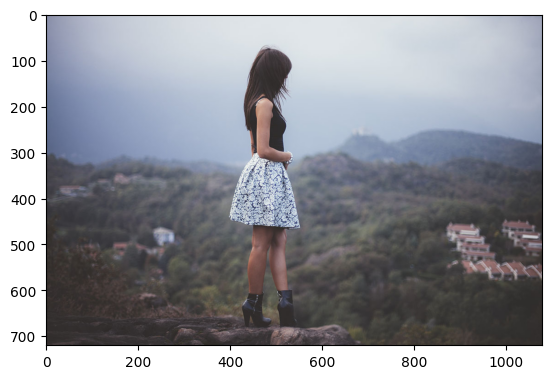

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
모델 출력: 0.9968198
hh_image_1.jpg는 사람입니다.
--------------------


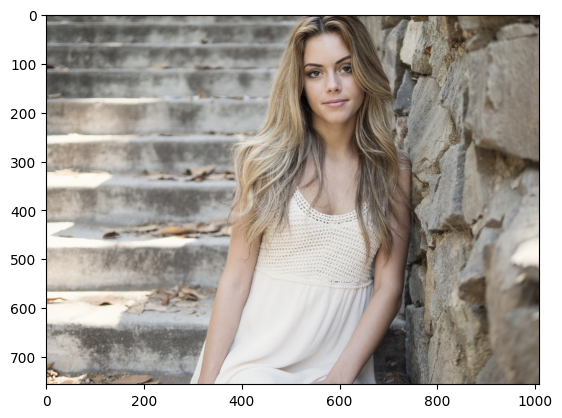

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
모델 출력: 0.029019315
hh_image_2.jpg는 말입니다.
--------------------


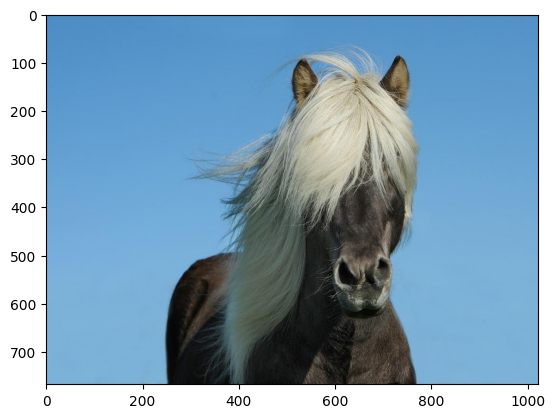

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
모델 출력: 3.7172472e-07
hh_image_3.jpg는 말입니다.
--------------------


In [11]:
%pip install matplotlib

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

### 이미지 증식

+ 회전
+ 수평 이동
+ 수직 이동
+ 기울임
+ 확대
+ 반전

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (300,300,3)),
    tf.keras.layers.RandomRotation(0.11, fill_mode = 'nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

model.fit(train_ds, epochs = 20)

Found 1027 files belonging to 2 classes.
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.5092 - loss: 0.7727
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.5632 - loss: 0.6856
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.6412 - loss: 0.6664
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.6533 - loss: 0.7377
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.7067 - loss: 0.5861
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - accuracy: 0.7777 - loss: 0.4762
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.7940 - loss: 0.4381
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.8531 - loss: 0.4057
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - accuracy: 0.8870 - loss: 0.2833
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.8832 - loss: 0.3283
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.9140 - loss: 0.2180
Epoch 1

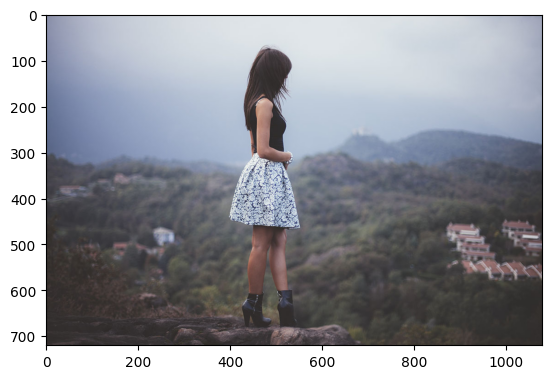

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
모델 출력: 0.9981408
hh_image_1.jpg는 사람입니다.
--------------------


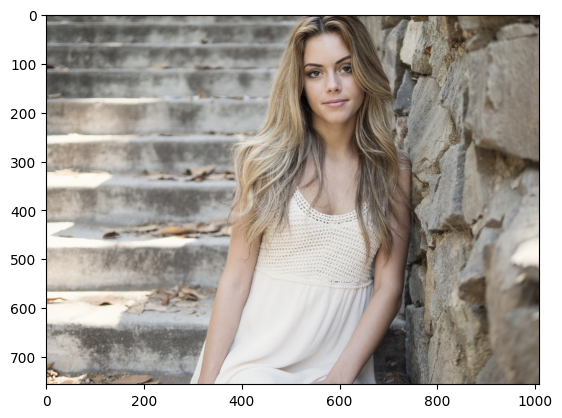

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
모델 출력: 0.4984095
hh_image_2.jpg는 말입니다.
--------------------


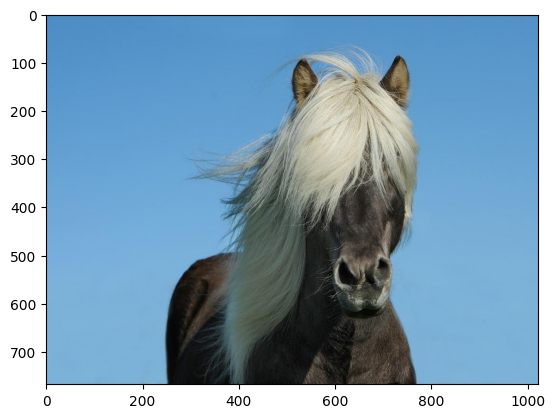

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
모델 출력: 0.97884166
hh_image_3.jpg는 사람입니다.
--------------------


In [23]:
for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')